### three hidden layers, sigmoid, XE


In [41]:
import numpy as np

'''read the data'''

# Specify the path to the CSV file
path_train = 'data/MNIST_train_1000.csv'
path_test = 'data/MNIST_test_100.csv'


data_train = np.genfromtxt(path_train, delimiter=',', skip_header=0, dtype=int)
data_test = np.genfromtxt(path_test, delimiter=',', skip_header=0, dtype=int)

In [42]:
m,m1 = data_train.shape[0], data_test.shape[0]
ny = 10

In [43]:
'''
get the training and test split and one-hot embedding of labels 

notice that each example is a column
'''

X_train = data_train[:,1:].T/255

Y_train = np.zeros([ny,m])
Y_train[data_train[:,0],range(m)]=1


X_test = data_test[:,1:].T/255

Y_test = np.zeros([ny,m1])
Y_test[data_test[:,0],range(m1)]=1

nx = X_train.shape[0]

In [44]:
'''define mini-batches and set up the number of hidden nodes'''

batch_size = 20
nh1,nh2,nh3 = 100,100,100

In [45]:
'''initialise weights and biases for three layer feed forward fully connected neural network'''

rng = np.random.default_rng()
W1 = (1/nx**0.5)*rng.normal(0,1,[nx,nh1])
b1 = np.zeros([nh1,1])
W2 = (1/nh1**0.5)*rng.normal(0,1,[nh1,nh2])
b2 = np.zeros([nh2,1])
W3 = (1/nh2**0.5)*rng.normal(0,1,[nh2,nh3])
b3 = np.zeros([nh3,1])
W4 = (1/nh3**0.5)*rng.normal(0,1,[nh3,ny])
b4 = np.zeros([ny,1])

In [46]:
''' define a few helper functions and hyperparameters '''
def sig(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0, keepdims = True)

n_batches = int(m/batch_size)
#lr = 0.0001
n_epoch = 100

errors =[]

In [47]:
''' training '''

lr=0.05

for epoch in range(n_epoch):
    # permute the data for SGD
    perm_idx = np.random.permutation(m)
    X_train = X_train[:,perm_idx]
    Y_train = Y_train[:,perm_idx]
    # keep track of errors of each epoch
    error = 0
    for bat in range(n_batches):
        x_batch = X_train[:,bat*batch_size:(1+bat)*batch_size]
        y_batch = Y_train[:,bat*batch_size:(1+bat)*batch_size]
        # forward pass
        z1 = np.matmul(W1.T,x_batch) + b1
        a1 = sig(z1)
        z2 = np.matmul(W2.T,a1) + b2
        a2 = sig(z2)
        z3 = np.matmul(W3.T,a2) + b3
        a3 = sig(z3)
        z4 = np.matmul(W4.T,a3) + b4
        a4 = softmax(z4)   #a4 = sig(z4)
        # backward pass
        e = y_batch - a4    
        #A4 = sig(z4)*(1-sig(z4))
        S4 = - e
        A3 = sig(z3)*(1-sig(z3))
        S3 = A3*np.matmul(W4,S4)
        A2 = sig(z2)*(1-sig(z2))
        S2 = A2*np.matmul(W3,S3)
        A1 = sig(z1)*(1-sig(z1))
        S1 = A1*np.matmul(W2,S2)
        # gradient descent
        dW4 = np.matmul(a3,S4.T)
        db4 = np.sum(S4, axis = 1, keepdims=True)
        dW3 = np.matmul(a2,S3.T)
        db3 = np.sum(S3, axis = 1, keepdims=True)
        dW2 = np.matmul(a1,S2.T)
        db2 = np.sum(S2, axis = 1, keepdims=True)
        dW1 = np.matmul(x_batch,S1.T)
        db1 = np.sum(S1, axis = 1, keepdims=True)
        W4 -= lr * dW4
        b4 -= lr * db4
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
        # compute the error 
        prob = a4[y_batch*a4 !=0]
        error += np.sum(-np.log(prob+0.00000001))
        #print("accumulated error:", error)
    print("Epoch:", epoch, "XE:", error)
    errors.append(error)
        
    
    

Epoch: 0 XE: 2457.120405762461
Epoch: 1 XE: 2323.1948338325365
Epoch: 2 XE: 2320.36419430923
Epoch: 3 XE: 2315.4004168467964
Epoch: 4 XE: 2312.9448943725997
Epoch: 5 XE: 2305.7841992829517
Epoch: 6 XE: 2222.7969967652107
Epoch: 7 XE: 1979.0709218449006
Epoch: 8 XE: 1808.983991259672
Epoch: 9 XE: 1522.3627908183762
Epoch: 10 XE: 1222.6163211561873
Epoch: 11 XE: 1031.8373047539762
Epoch: 12 XE: 870.706498417637
Epoch: 13 XE: 757.3911859660014
Epoch: 14 XE: 581.4594321081562
Epoch: 15 XE: 493.29895904690363
Epoch: 16 XE: 432.6216524157057
Epoch: 17 XE: 330.8925817791335
Epoch: 18 XE: 304.60874347619574
Epoch: 19 XE: 249.06065733803194
Epoch: 20 XE: 218.56847992978697
Epoch: 21 XE: 142.48366927351594
Epoch: 22 XE: 108.5573551455191
Epoch: 23 XE: 88.90455101344592
Epoch: 24 XE: 60.90799052654698
Epoch: 25 XE: 53.51541210828309
Epoch: 26 XE: 36.867769106119724
Epoch: 27 XE: 26.86609793113798
Epoch: 28 XE: 20.2394953233427
Epoch: 29 XE: 15.443183320467467
Epoch: 30 XE: 11.9380763237489
Epoch:

Text(0.5, 1.0, '3 hidden, Sigmoid, XE')

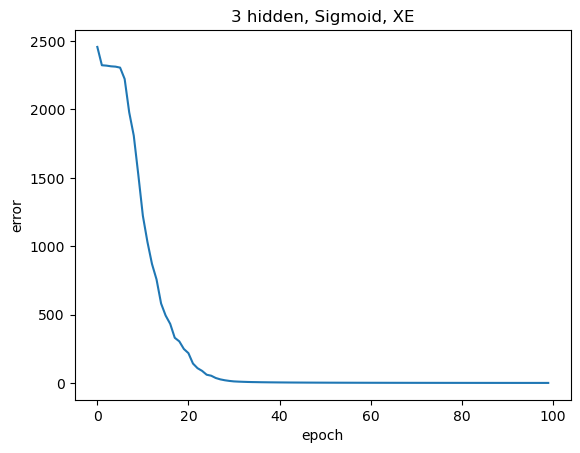

In [48]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('3 hidden, Sigmoid, XE')

# Test   83%

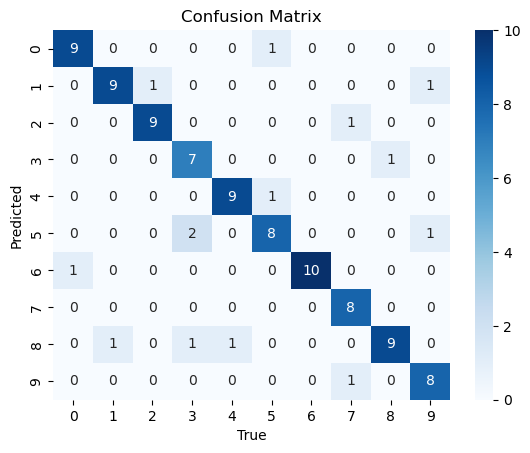

In [49]:
'''Forward pass the test data '''

z1 = np.matmul(W1.T,X_test) + b1
a1 = sig(z1)
z2 = np.matmul(W2.T,a1) + b2
a2 = sig(z2)
z3 = np.matmul(W3.T,a2) + b3
a3 = sig(z3)
z4 = np.matmul(W4.T,a3) + b4
a4 = softmax(z4)

''' turn the output into predictions '''

pos = np.argmax(a4, axis =0)
y_pred = np.zeros_like(a4)
y_pred[pos,range(y_pred.shape[1])] = 1

''' compute the confusion matirx '''
confusion = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        confusion[i,j] = np.dot(y_pred[i],Y_test[j])

import seaborn as sns

confusion_int = confusion.astype(int)

sns.heatmap(confusion_int, annot = True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [50]:
np.trace(confusion)/X_test.shape[1]

0.86